In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import os
import re
import nibabel as nib
import numpy as np
from shutil import copyfile

# CEL dataset

In [2]:
visms_path = '/media/transcend/MSReports/CEL/CEL_train/VISMS/'
final_path = '/media/transcend/ContinualLearning/CEL/'

t1_name = 't1.nii.gz'
t1c_name = 't1c.nii.gz'
flair_name = 'flair.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'brain_mask.nii.gz'

visms_sub = [sub for sub in os.listdir(visms_path) if os.path.isdir(os.path.join(visms_path, sub))]

for si, sub in enumerate(sorted(visms_sub)):
    sub_code = int(re.search(r'\d+', sub).group())
    origin = os.path.join(visms_path, sub)
    destination = os.path.join(final_path, 'sub-VIS{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(visms_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        t_destination = os.path.join(destination, 'ses-{:}'.format(t.lower()))
        if not os.path.exists(t_destination):
            os.mkdir(t_destination)
        copyfile(
            os.path.join(t_origin, t1_name),
            os.path.join(t_destination, t1_name)
        )
        copyfile(
            os.path.join(t_origin, t1c_name),
            os.path.join(t_destination, t1c_name)
        )
        copyfile(
            os.path.join(t_origin, flair_name),
            os.path.join(t_destination, flair_name)
        )
        copyfile(
            os.path.join(t_origin, gt_name),
            os.path.join(t_destination, 'manual_mask.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, brain_name),
            os.path.join(t_destination, brain_name)
        )

In [3]:
b0_path = '/media/transcend/MSReports/CEL/CEL_train/Batch0/'
final_path = '/media/transcend/ContinualLearning/CEL/'

b0_sub = [sub for sub in os.listdir(b0_path) if os.path.isdir(os.path.join(b0_path, sub))]

t1_name = 't1.nii.gz'
t1c_name = 't1c.nii.gz'
flair_name = 'flair.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'brain_mask.nii.gz'

for si, sub in enumerate(sorted(b0_sub)):
    sub_code = int(sub)
    origin = os.path.join(b0_path, sub)
    destination = os.path.join(final_path, 'sub-POS{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(b0_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        t_destination = os.path.join(destination, 'ses-{:}'.format(t))
        if not os.path.exists(t_destination):
            os.mkdir(t_destination)
        copyfile(
            os.path.join(t_origin, t1_name),
            os.path.join(t_destination, t1_name)
        )
        copyfile(
            os.path.join(t_origin, t1c_name),
            os.path.join(t_destination, t1c_name)
        )
        copyfile(
            os.path.join(t_origin, flair_name),
            os.path.join(t_destination, flair_name)
        )
        copyfile(
            os.path.join(t_origin, gt_name),
            os.path.join(t_destination, 'manual_mask.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, brain_name),
            os.path.join(t_destination, brain_name)
        )

In [4]:
test_path = '/media/transcend/MSReports/CEL/CEL_testing/'
final_path = '/media/transcend/ContinualLearning/CEL/'

test_sub = [sub for sub in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, sub))]

t1_name = 'T1_pre_reg2_T1_post.nii.gz'
t1c_name = 'T1_post.nii.gz'
flair_name = 'FLAIR_reg2_T1_post.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'T1_post_brain_mask.nii.gz'

for si, sub in enumerate(sorted(test_sub)):
    sub_code = int(sub)
    origin = os.path.join(test_path, sub)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    volumes = []
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(test_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        mask_nii = nib.load(os.path.join(t_origin, gt_name))
        volumes.append(np.sum(mask_nii.get_fdata()) > 0)
    positive = np.any(volumes)
    if positive:       
        destination = os.path.join(final_path, 'sub-POS{:05d}'.format(sub_code))
    else:       
        destination = os.path.join(final_path, 'sub-NEG{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    for ti, (t, pos_t) in enumerate(zip(timepoints, volumes)):
        if (positive and pos_t) or not positive:
            t_origin = os.path.join(origin, t)
            t_destination = os.path.join(destination, 'ses-{:}'.format(t))
            if not os.path.exists(t_destination):
                os.mkdir(t_destination)
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1_name)),
                os.path.join(t_destination, 't1.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1c_name)),
                os.path.join(t_destination, 't1c.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, flair_name)),
                os.path.join(t_destination, 'flair.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, gt_name),
                os.path.join(t_destination, 'manual_mask.nii.gz')
            )
            copyfile(
                os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, brain_name)),
                os.path.join(t_destination, 'brain_mask.nii.gz')
            )
                

In [5]:
neg_path = '/media/transcend/MSReports/CEL/NoCEL/'
final_path = '/media/transcend/ContinualLearning/CEL/'

neg_sub = [sub for sub in os.listdir(neg_path) if os.path.isdir(os.path.join(neg_path, sub))]

t1_name = 'T1_pre_reg2_T1_post.nii.gz'
t1c_name = 'T1_post.nii.gz'
flair_name = 'FLAIR_reg2_T1_post.nii.gz'
gt_name = 'cel_new.nii.gz'
brain_name = 'T1_post_brain_mask.nii.gz'

for si, sub in enumerate(sorted(neg_sub)):
    sub_code = int(sub)
    origin = os.path.join(neg_path, sub)
    destination = os.path.join(final_path, 'sub-NEG{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    timepoints = [t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))]
    for ti, t in enumerate(timepoints):
        print(' '.join([' '] * 300), end='\r')
        print(
            'Loading subject {:} ({:}) [{:03d}/{:03d} - {:03d}/{:03d}]'.format(
                sub, t, si + 1, len(neg_sub), ti + 1, len(timepoints)
            ), end='\r'
        )
        t_origin = os.path.join(origin, t)
        t_destination = os.path.join(destination, 'ses-{:}'.format(t))
        if not os.path.exists(t_destination):
            os.mkdir(t_destination)
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1_name)),
            os.path.join(t_destination, 't1.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, t1c_name)),
            os.path.join(t_destination, 't1c.nii.gz')
        )
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, flair_name)),
            os.path.join(t_destination, 'flair.nii.gz')
        )
        mask_nii = nib.load(os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, brain_name)))
        no_mask = np.zeros_like(mask_nii.get_fdata())
        mask_nii = nib.Nifti1Image(no_mask, mask_nii.get_qform(), mask_nii.header)
        mask_nii.to_filename(os.path.join(t_destination, 'manual_mask.nii.gz'))
        copyfile(
            os.path.join(t_origin, '{:}_{:}_{:}'.format(sub, t, brain_name)),
            os.path.join(t_destination, 'brain_mask.nii.gz')
        )

# Activity dataset

In [2]:
msseg_path = '/media/transcend/MSReports/Longitudinal/MICCAI_Challenge2021/training/'
final_path = '/media/transcend/ContinualLearning/Activity/'

msseg_sub = [
    sub for sub in os.listdir(msseg_path)
    if os.path.isdir(os.path.join(msseg_path, sub)) and 'CLARA' not in sub
]

flair1_name = 'flair_time01_on_middle_space_n4.nii.gz'
flair2_name = 'flair_time02_on_middle_space_n4.nii.gz'
gt_name = 'ground_truth.nii.gz'
brain_name = 'brain_mask.nii.gz'

for si, sub in enumerate(sorted(msseg_sub)):
    sub_code = int(sub)
    origin = os.path.join(msseg_path, sub)
    mask_nii = nib.load(os.path.join(origin, gt_name))
    positive = np.sum(mask_nii.get_fdata()) > 0   
    if positive:       
        destination = os.path.join(final_path, 'sub-CHP{:05d}'.format(sub_code))
    else:       
        destination = os.path.join(final_path, 'sub-CHN{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    print(' '.join([' '] * 300), end='\r')
    print(
        'Loading subject {:} [{:03d}/{:03d}]'.format(
            sub, si + 1, len(msseg_sub),
        ), end='\r'
    )
    copyfile(
        os.path.join(origin, flair1_name),
        os.path.join(destination, 'flair01.nii.gz')
    )
    copyfile(
        os.path.join(origin, flair2_name),
        os.path.join(destination, 'flair02.nii.gz')
    )
    copyfile(
        os.path.join(origin, gt_name),
        os.path.join(destination, 'manual_mask.nii.gz')
    )
    copyfile(
        os.path.join(origin, brain_name),
        os.path.join(destination, brain_name)
    )

In [3]:
train_path = '/media/transcend/MSReports/Longitudinal/MICCAI_Challenge2021/private/'
final_path = '/media/transcend/ContinualLearning/Activity/'

train_sub = [
    sub for sub in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, sub))
]

flair1_name = 'flair_time01_on_middle_space_n4.nii.gz'
flair2_name = 'flair_time02_on_middle_space_n4.nii.gz'
gt_name = 'ground_truth.nii.gz'
brain_name = 'brain_mask.nii.gz'

conversion_dict = {
    'GE': 'G3T',
    'P1': 'P1T',
    'P3': 'P3T',
    'S3': 'S3T'
}

for si, sub in enumerate(sorted(train_sub)):
    sub_acq, sub_code = sub.split('_')
    origin = os.path.join(train_path, sub)
    destination = os.path.join(
        final_path, 'sub-{:}{:05d}'.format(conversion_dict[sub_acq], int(sub_code))
    )
    if not os.path.exists(destination):
        os.mkdir(destination)
    print(' '.join([' '] * 300), end='\r')
    print(
        'Loading subject {:} [{:03d}/{:03d}]'.format(
            sub, si + 1, len(train_sub),
        ), end='\r'
    )
    copyfile(
        os.path.join(origin, flair1_name),
        os.path.join(destination, 'flair01.nii.gz')
    )
    copyfile(
        os.path.join(origin, flair2_name),
        os.path.join(destination, 'flair02.nii.gz')
    )
    copyfile(
        os.path.join(origin, gt_name),
        os.path.join(destination, 'manual_mask.nii.gz')
    )
    copyfile(
        os.path.join(origin, brain_name),
        os.path.join(destination, brain_name)
    )

In [7]:
test_path = '/media/transcend/MSReports/Longitudinal/Longitudinal_testing'
final_path = '/media/transcend/ContinualLearning/Activity/'

test_sub = [
    sub for sub in os.listdir(test_path)
    if os.path.isdir(os.path.join(test_path, sub))
]

gt_name = 'positive_activity_new.nii.gz'
brain_name = 'brain_mask.nii.gz'

for si, sub in enumerate(sorted(test_sub)):
    sub_code = int(sub)
    origin = os.path.join(test_path, sub)
    timepoints = sorted([t for t in os.listdir(origin) if os.path.isdir(os.path.join(origin, t))])
    t = timepoints[-1]
    bl = timepoints[0]
    t_origin = os.path.join(origin, t)
    
    mask_nii = nib.load(os.path.join(t_origin, gt_name))
    positive = np.sum(mask_nii.get_fdata()) > 0
    
    if positive:       
        destination = os.path.join(final_path, 'sub-POS{:05d}'.format(sub_code))
    else:       
        destination = os.path.join(final_path, 'sub-NEG{:05d}'.format(sub_code))
    if not os.path.exists(destination):
        os.mkdir(destination)
    
    print(' '.join([' '] * 300), end='\r')
    print(
        'Loading subject {:} [{:03d}/{:03d}]'.format(
            sub, si + 1, len(test_sub),
        ), end='\r'
    )
        
    copyfile(
        os.path.join(t_origin, '{:}_{:}_FLAIR_reg2_{:}.nii.gz'.format(sub, bl, t)),
        os.path.join(destination, 'flair01.nii.gz')
    )
    copyfile(
        os.path.join(t_origin, '{:}_{:}_FLAIR_n4.nii.gz'.format(sub, t)),
        os.path.join(destination, 'flair02.nii.gz')
    )
    copyfile(
        os.path.join(t_origin, gt_name),
        os.path.join(destination, 'manual_mask.nii.gz')
    )
    copyfile(
        os.path.join(t_origin, brain_name),
        os.path.join(destination, brain_name)
    )

In [37]:
import os
import numpy as np
import time
import datasets
import models
import yaml
with open('/media/transcend/IncrementalLearning/cel_unet.yml', 'r') as stream:
    try:
        config = yaml.load(stream, Loader=yaml.FullLoader)
    except yaml.YAMLError as exc:
        print(exc)
print(config)

{'path': '/media/transcend/IncrementalLearning/CEL', 'files': ['t1.nii.gz', 't1c.nii.gz', 'flair.nii.gz'], 'roi': 'brain_mask.nii.gz', 'labels': 'manual_mask.nii.gz', 'multisession': True, 'task_size': 10, 'training': <class 'datasets.ImageCroppingDataset'>, 'validation': <class 'datasets.ImageDataset'>, 'patch_size': 32, 'train_batch': 32, 'network': <class 'models.DualHeadedUNet'>, 'filters': [8, 16, 32, 64, 128, 256, 512], 'seeds': [42, 80702, 74794, 62021, 48497], 'val_rate': 0.1, 'epochs': 25, 'patience': 10, 'output_path': '/media/transcend/IncrementalLearning/Models', 'model_name': 'cel_unet', 'folds': 5}


In [40]:
from utils import time_to_string, get_mask, get_normalised_image, find_file

def get_dataset(experiment_config, subject_list):
    d_path = experiment_config['path']
    load_start = time.time()
    
    subjects = []
    labels = []
    rois = []
    for pi, p in enumerate(subject_list):
        p_path = os.path.join(d_path, p)
        loads = len(subject_list) - pi
        load_elapsed = time.time() - load_start
        load_eta = loads * load_elapsed / (pi + 1)
        if config['multisession']:
            sessions = [
                session for session in os.listdir(p_path)
                if os.path.isdir(os.path.join(p_path, session))
            ]
            for si, session in enumerate(sessions):                
                print(' '.join([' '] * 300), end='\r')
                print(
                    'Loading subject {:} [{:}] ({:d}/{:d} - {:d}/{:d}) '
                    '{:} ETA {:}'.format(
                        p, session, pi + 1, len(subjects),
                        si + 1, len(sessions),
                        time_to_string(load_elapsed),
                        time_to_string(load_eta),
                    ), end='\r'
                )
                s_path = os.path.join(p_path, session)
                roi.append(get_mask(find_file(config['roi'], s_path)))
                labels.append(get_mask(find_file(config['labels'], s_path)))
                if isinstance(config['files'], tuple):
                    images = tuple(load_image_list(s_path, file_i, roi) for file_i in config['files'])
                else:
                    images = load_image_list(s_path, config['files'], roi)
                subjects.append(images)
        else:
            print(' '.join([' '] * 300), end='\r')
            print(
                'Loading subject {:} ({:d}/{:d}) '
                '{:} ETA {:}'.format(
                    p, pi + 1, len(subjects),
                    time_to_string(load_elapsed),
                    time_to_string(load_eta),
                ), end='\r'
            )
            roi.append(get_mask(find_file(config['roi'], p_path)))
            labels.append(get_mask(find_file(config['labels'], p_path)))
            if isinstance(config['files'], tuple):
                images = tuple(load_image_list(p_path, file_i, roi) for file_i in config['files'])
            else:
                images = load_image_list(p_path, config['files'], roi)
            subjects.append(images)

    return subjects, labels, rois

def load_image_list(path, image_list, roi):
    images = [
        get_normalised_image(os.path.join(path, image), roi)
        for image in image_list
    ]
    
    return np.stack(images)

In [43]:
def get_subjects(experiment_config):
    d_path = experiment_config['path']
    multitask = False
    task = 'Continuum'
    tasks = [task]
    try:
        if config['tasks'] is not None:
            multitask = True
            tasks = config['tasks']
    except KeyError:
        pass
    
    subjects = [
        patient for patient in os.listdir(d_path)
        if os.path.isdir(os.path.join(d_path, patient))
    ]
    subject_dicts = {
        task: [] for task in tasks
    }
    load_start = time.time()
    for pi, p in enumerate(subjects):
        if multitask:
            for task in tasks:
                if task in p:
                    break
        p_path = os.path.join(d_path, p)
        subject_dicts[task].append(p)
    return subject_dicts

In [57]:
subjects = get_subjects(config)

shuffled_subjects = np.random.permutation(subjects['Continuum'])
training_validation = [
    len(array.tolist())
    for array in np.array_split(
        shuffled_subjects,
        len(shuffled_subjects) // 20
    )
]
print(training_validation)

[21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20]


In [58]:
if isinstance(config['files'], tuple):
    n_images = len(config['files'][0])
else:
    n_images = len(config['files']) 
net = config['network'](
    conv_filters=config['filters'],
    n_images=n_images
)

In [143]:
import os
import json
import numpy as np
json_path = '/media/transcend/IncrementalLearning/Masks/Activity/'
naive_file = 'activity_unet-naive_test.f4.s62021.t09.jsom'
bl_file = 'activity_unet-baseline_testing.f4.s62021.jsom'

json_file = os.path.join(json_path, naive_file)
with open(json_file, 'r') as testing_json:
    naive_results = json.load(testing_json)
    
json_file = os.path.join(json_path, bl_file)
with open(json_file, 'r') as testing_json:
    bl_results = json.load(testing_json)
    

positive_naive = {
    sub: data
    for sub, data in naive_results.items() if 'CHN' not in sub and 'NEG' not in sub
}
chp_naive = {
    sub: data
    for sub, data in naive_results.items() if 'CHP' in sub
}
pos_naive = {
    sub: data
    for sub, data in naive_results.items() if 'POS' in sub
}
train_naive = {
    sub: data
    for sub, data in naive_results.items()
    if not np.any([tag in sub for tag in ['NEG', 'CHN', 'CHP', 'POS']]).any()
}

positive_bl = {
    sub: data
    for sub, data in bl_results.items() if 'CHN' not in sub and 'NEG' not in sub
}
chp_bl = {
    sub: data
    for sub, data in bl_results.items() if 'CHP' in sub
}
pos_bl = {
    sub: data
    for sub, data in bl_results.items() if 'POS' in sub
}
train_bl = {
    sub: data
    for sub, data in bl_results.items()
    if not np.any([tag in sub for tag in ['NEG', 'CHN', 'CHP', 'POS']]).any()
}

In [144]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

def plot_bands(
    x, y, yinf, ysup, ax, xmin=None, xmax=None, ymin=0, ymax=1,
    title='', xlabel='Epoch', ylabel='Metric', legend=None
):
    # Init
    if xmin is None:
        xmin = np.min(x)
    if xmax is None:
        xmax = np.max(x)
    if ymin is None:
        ymin = np.min(yinf)
    if ymax is None:
        ymax = np.max(ysup)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    colomap = ['b', 'g', 'c', 'r', 'm', 'y', 'k']

    if yinf is not None and ysup is not None:
        for yi, yinfi, ysupi, ci in zip(y, yinf, ysup, colomap):
            ax.plot(x, yi, '-', color=ci)
            ax.fill_between(x, yinfi, ysupi, alpha=0.2, color=ci)
    else:
        for yi, ci in zip(y, colomap):
            ax.plot(x, yi, '-', color=ci, linewidth=2.0)

    ax.set_xlim(xmin=xmin, xmax=xmax)
    ax.set_ylim(ymin=ymin, ymax=ymax)

    if legend is not None:
        ax.legend(legend)

In [145]:
def plot_metrics(baseline, naive, dataset, filename, n_tasks=10):
    seeds = ['42', '80702', '74794', '62021']
    dsc_bl = [
        [
            [
                2 * tpv / (2 * tpv + fnv + fpv)
                for tpv, fnv, fpv in zip(
                    sub_data[seed]['TPV'],
                    sub_data[seed]['FNV'],
                    sub_data[seed]['FPV']
                )
            ] * 10
            for sub_data in baseline.values()
        ]
        for seed in seeds
    ]
    dtpf_bl = [
        [
            [
                tpr / gtr
                for tpr, gtr in zip(
                    sub_data[seed]['TPR'],
                    sub_data[seed]['GTR']
                )
            ] * 10
            for sub_data in baseline.values()
        ]
        for seed in seeds
    ]
    f1_bl = [
        [
            [
                2 * tpr / (r + gtr)
                for tpr, gtr, r in zip(
                    sub_data[seed]['TPR'],
                    sub_data[seed]['GTR'],
                    sub_data[seed]['R']
                )
            ] * 10
            for sub_data in baseline.values()
        ]
        for seed in seeds
    ]

    dsc_naive = [
        [
            [
                2 * tpv / (2 * tpv + fnv + fpv)
                for tpv, fnv, fpv in zip(
                    sub_data[seed]['TPV'],
                    sub_data[seed]['FNV'],
                    sub_data[seed]['FPV']
                )
            ]
            for sub_data in naive.values()
        ]
        for seed in seeds
    ]
    dtpf_naive = [
        [
            [
                tpr / gtr
                for tpr, gtr in zip(
                    sub_data[seed]['TPR'],
                    sub_data[seed]['GTR']
                )
            ]
            for sub_data in naive.values()
        ]
        for seed in seeds
    ]
    f1_naive = [
        [
            [
                2 * tpr / (r + gtr)
                for tpr, gtr, r in zip(
                    sub_data[seed]['TPR'],
                    sub_data[seed]['GTR'],
                    sub_data[seed]['R']
                )
            ]
            for sub_data in naive.values()
        ]
        for seed in seeds
    ]

    fig = plt.figure(figsize=(18, 6))
    ax = plt.subplot(1, 3, 1)
    mean_tasks_bl = np.mean(dsc_bl, axis=1)
    mean_tasks_naive = np.mean(dsc_naive, axis=1)
    x = list(range(n_tasks))
    y = np.stack([
        np.mean(mean_tasks_bl, axis=0),
        np.mean(mean_tasks_naive, axis=0)
    ], axis=0)
    yinf = np.stack([
        np.min(mean_tasks_bl, axis=0),
        np.min(mean_tasks_naive, axis=0)
    ], axis=0)
    ysup = np.stack([
        np.max(mean_tasks_bl, axis=0),
        np.max(mean_tasks_naive, axis=0)
    ], axis=0)
    plot_bands(
        x, y, yinf, ysup, ax, title='DSC evolution ({:})'.format(dataset), xlabel='Task', ylabel='DSC',
        legend=['Baseline', 'Naive']
    )

    ax = plt.subplot(1, 3, 2)
    mean_tasks_bl = np.mean(dtpf_bl, axis=1)
    mean_tasks_naive = np.mean(dtpf_naive, axis=1)
    x = list(range(n_tasks))
    y = np.stack([
        np.mean(mean_tasks_bl, axis=0),
        np.mean(mean_tasks_naive, axis=0)
    ], axis=0)
    yinf = np.stack([
        np.min(mean_tasks_bl, axis=0),
        np.min(mean_tasks_naive, axis=0)
    ], axis=0)
    ysup = np.stack([
        np.max(mean_tasks_bl, axis=0),
        np.max(mean_tasks_naive, axis=0)
    ], axis=0)
    plot_bands(
        x, y, yinf, ysup, ax, title='TPF evolution ({:})'.format(dataset), xlabel='Task', ylabel='TPF%',
        legend=['Baseline', 'Naive']
    )

    ax = plt.subplot(1, 3, 3)
    mean_tasks_bl = np.mean(f1_bl, axis=1)
    mean_tasks_naive = np.mean(f1_naive, axis=1)
    x = list(range(n_tasks))
    y = np.stack([
        np.mean(mean_tasks_bl, axis=0),
        np.mean(mean_tasks_naive, axis=0)
    ], axis=0)
    yinf = np.stack([
        np.min(mean_tasks_bl, axis=0),
        np.min(mean_tasks_naive, axis=0)
    ], axis=0)
    ysup = np.stack([
        np.max(mean_tasks_bl, axis=0),
        np.max(mean_tasks_naive, axis=0)
    ], axis=0)
    plot_bands(
        x, y, yinf, ysup, ax, title='F1 evolution ({:})'.format(dataset), xlabel='Task', ylabel='F1',
        legend=['Baseline', 'Naive']
    )

    plt.tight_layout()
    plt.savefig(filename)

<IPython.core.display.Javascript object>


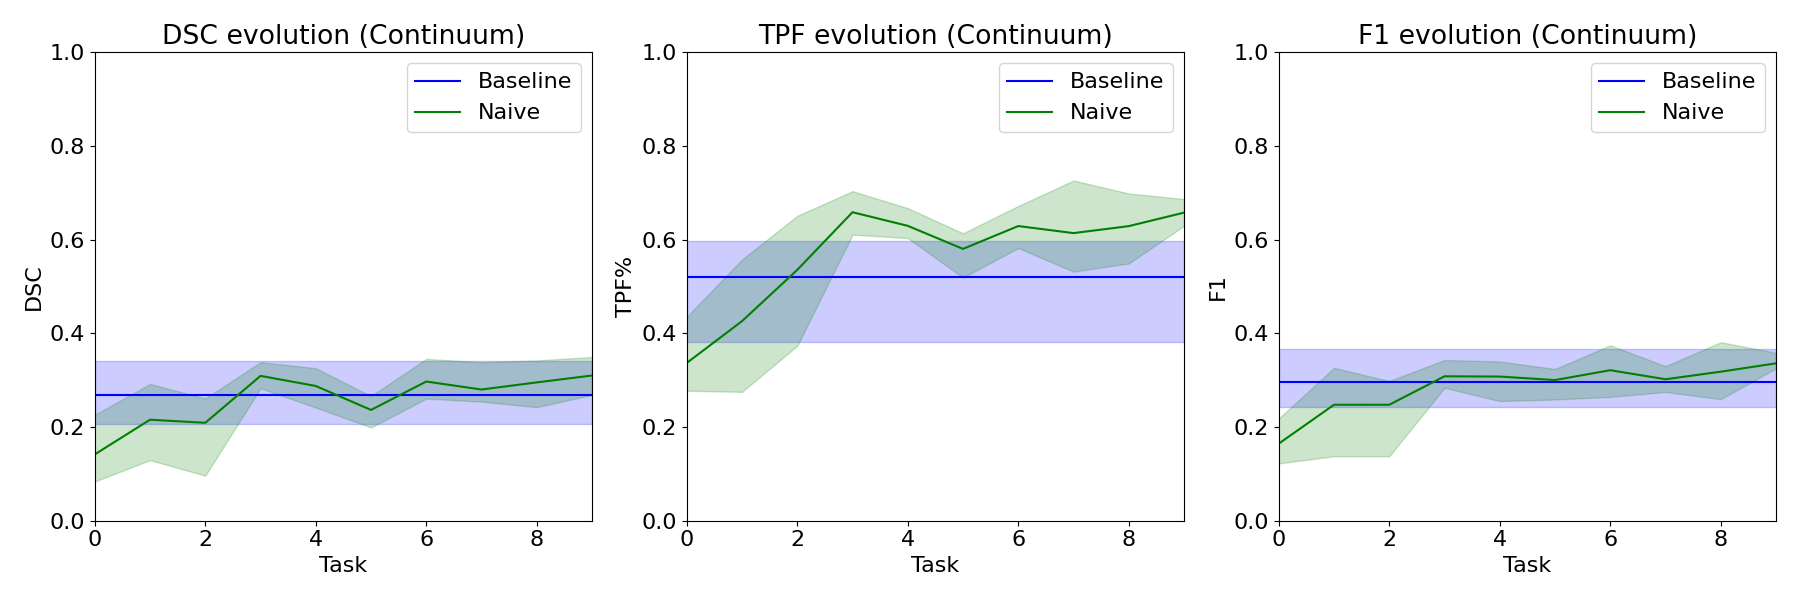

<IPython.core.display.Javascript object>


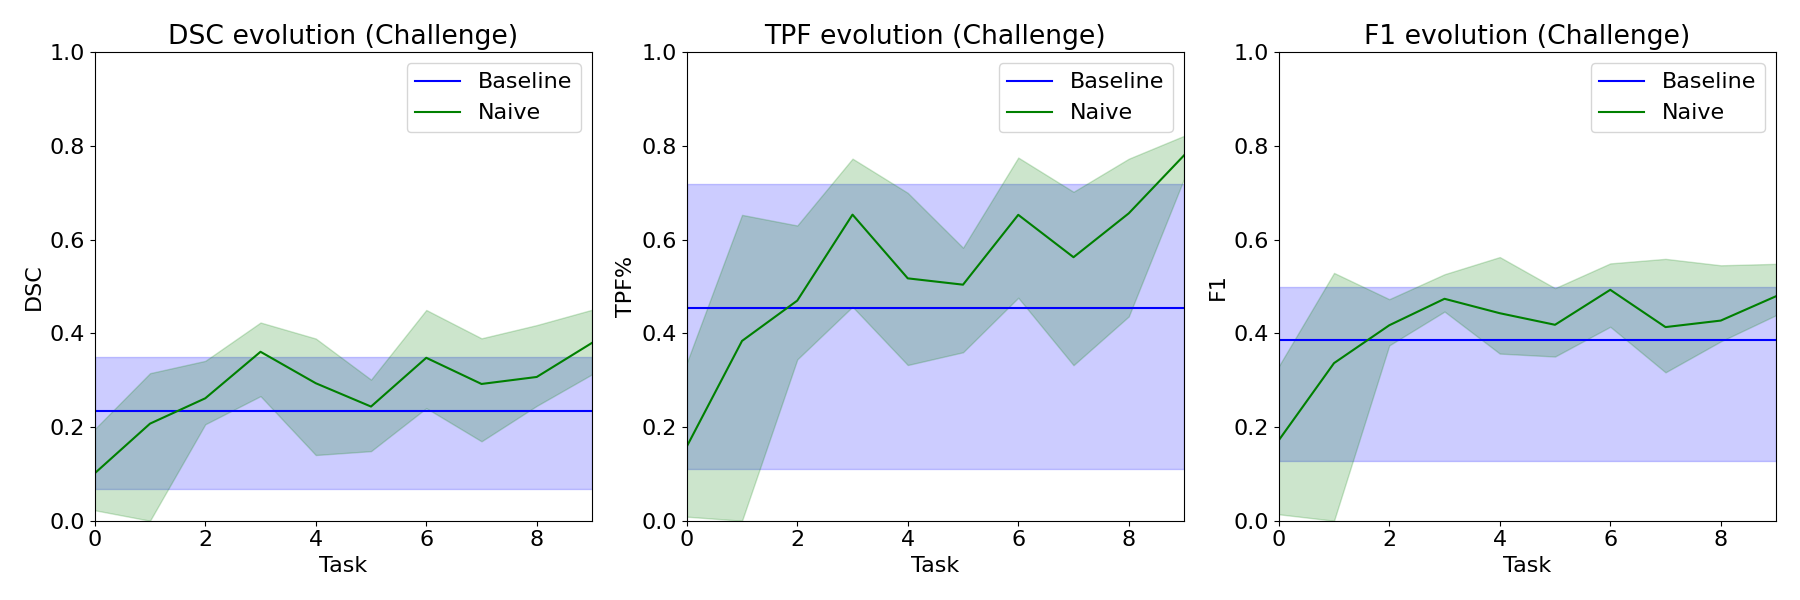

<IPython.core.display.Javascript object>


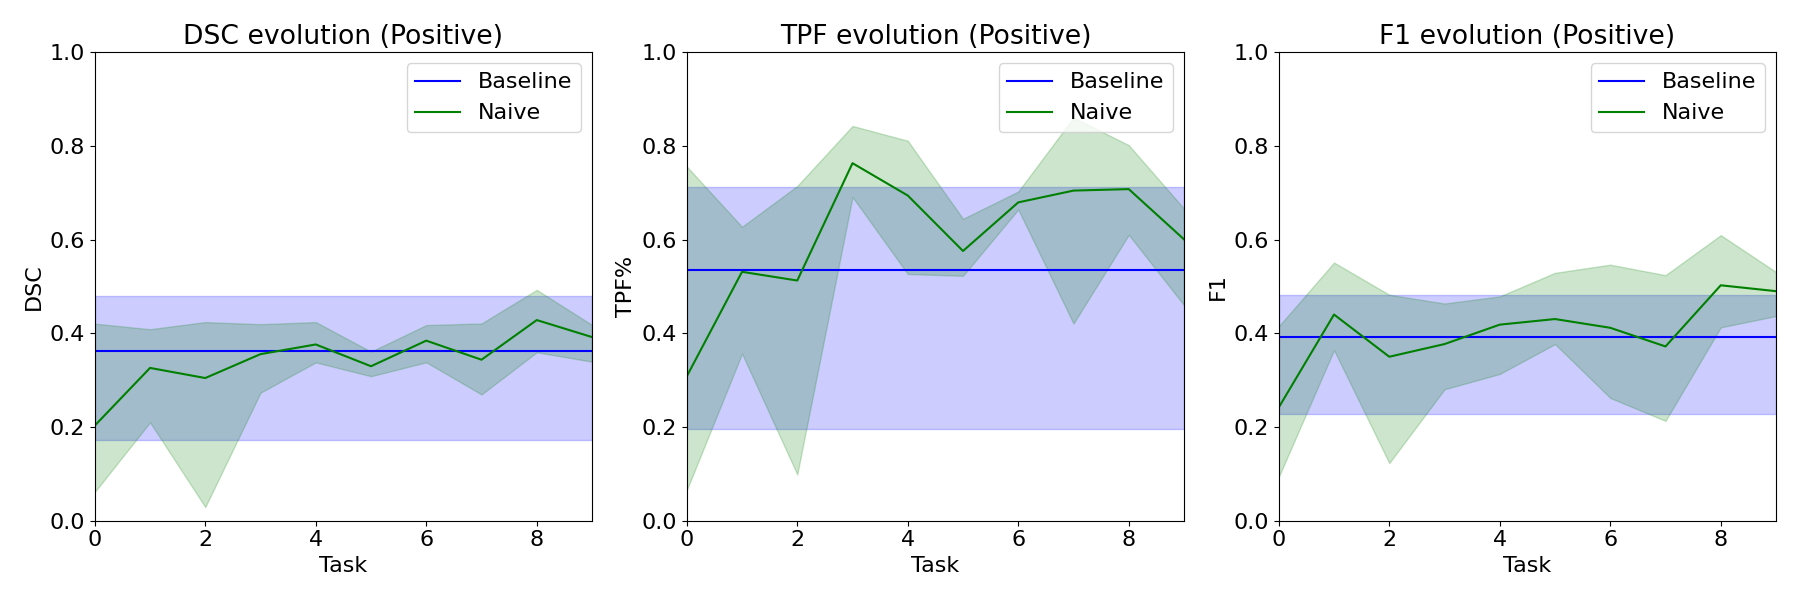

<IPython.core.display.Javascript object>


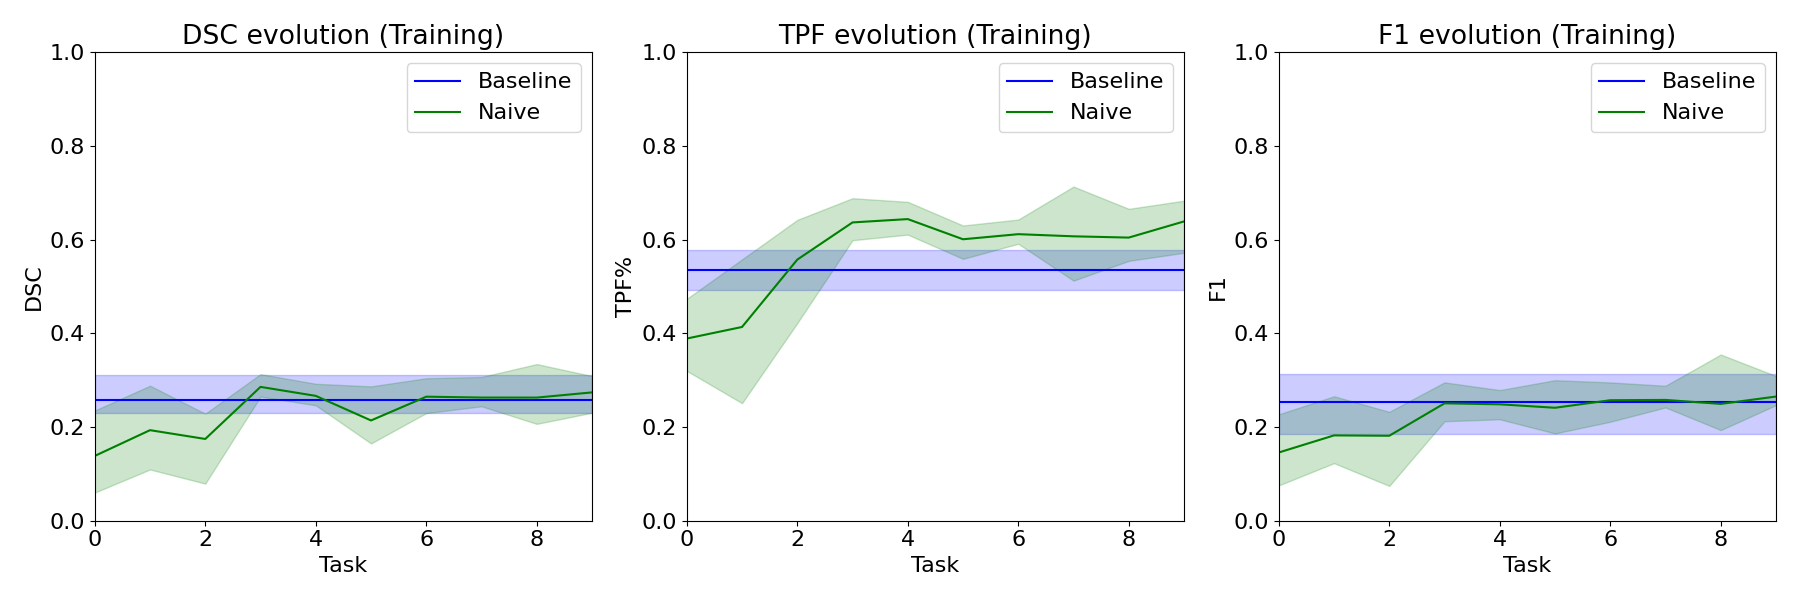

In [146]:
plot_metrics(positive_bl, positive_naive, 'Continuum', os.path.join(json_path, 'continuum_test_plots.png'))
plot_metrics(chp_bl, chp_naive, 'Challenge', os.path.join(json_path, 'chp_test_plots.png'))
plot_metrics(pos_bl, pos_naive, 'Positive', os.path.join(json_path, 'pos_test_plots.png'))
plot_metrics(train_bl, train_naive, 'Training', os.path.join(json_path, 'trainset_test_plots.png'))

In [150]:
import seaborn as sn

def plot_train_metrics(baseline, naive, dataset, filename, seed, fold, n_tasks=10):
    dsc_bl = np.swapaxes([
        np.mean([
            [
                2 * tpv / (2 * tpv + fnv + fpv)
                for tpv, fnv, fpv in zip(
                    sub_data['TPV'][1:],
                    sub_data['FNV'][1:],
                    sub_data['FPV'][1:]
                )
            ]
            for sub_data in task.values()
        ], axis=0)
        for task in baseline
    ], 0, 1)
    dtpf_bl = np.swapaxes([
        np.mean([
            [
                tpr / gtr
                for tpr, gtr in zip(
                    sub_data['TPR'][1:],
                    sub_data['GTR'][1:]
                )
            ]
            for sub_data in task.values()
        ], axis=0)
        for task in baseline
    ], 0, 1)
    f1_bl = np.swapaxes([
        np.mean([
            [
                2 * tpr / (r + gtr)
                for tpr, gtr, r in zip(
                    sub_data['TPR'][1:],
                    sub_data['GTR'][1:],
                    sub_data['R'][1:]
                )
            ]
            for sub_data in task.values()
        ], axis=0)
        for task in baseline
    ], 0, 1)

    dsc_naive = np.swapaxes([
        np.mean([
            [
                2 * tpv / (2 * tpv + fnv + fpv)
                for tpv, fnv, fpv in zip(
                    sub_data['TPV'][1:],
                    sub_data['FNV'][1:],
                    sub_data['FPV'][1:]
                )
            ]
            for sub_data in task.values()
        ], axis=0)
        for task in naive
    ], 0, 1)
    dtpf_naive = np.swapaxes([
        np.mean([
            [
                tpr / gtr
                for tpr, gtr in zip(
                    sub_data['TPR'][1:],
                    sub_data['GTR'][1:]
                )
            ]
            for sub_data in task.values()
        ], axis=0)
        for task in naive
    ], 0, 1)
    f1_naive = np.swapaxes([
        np.mean([
            [
                2 * tpr / (r + gtr)
                for tpr, gtr, r in zip(
                    sub_data['TPR'][1:],
                    sub_data['GTR'][1:],
                    sub_data['R'][1:]
                )
            ]
            for sub_data in task.values()
        ], axis=0)
        for task in naive
    ], 0, 1)

    fig = plt.figure(figsize=(18, 6))
    ax = plt.subplot(1, 3, 1)
    sn.heatmap(
        np.concatenate([dsc_bl, dsc_naive]), cmap='jet', vmin=0,
        xticklabels=['Task{:02d}'.format(si) for si in range(len(naive))],
        yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(len(naive))]
    )
    plt.title('DSC (segmentation) - Seed {:} - Fold {:02d}'.format(seed, fold))

    ax = plt.subplot(1, 3, 2)
    sn.heatmap(
        np.concatenate([dtpf_bl, dtpf_naive]), cmap='jet', vmin=0,
        xticklabels=['Task{:02d}'.format(si) for si in range(len(naive))],
        yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(len(naive))]
    )
    plt.title('TPF% (detection) - Seed {:} - Fold {:02d}'.format(seed, fold))

    ax = plt.subplot(1, 3, 3)
    sn.heatmap(
        np.concatenate([f1_bl, f1_naive]), cmap='jet', vmin=0,
        xticklabels=['Task{:02d}'.format(si) for si in range(len(naive))],
        yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(len(naive))]
    )
    plt.title('F1 score (detection) - Seed {:} - Fold {:02d}'.format(seed, fold))

    plt.tight_layout()
    plt.savefig(filename)
    
    return dsc_bl, dsc_naive, dtpf_bl, dtpf_naive, f1_bl, f1_naive

<IPython.core.display.Javascript object>


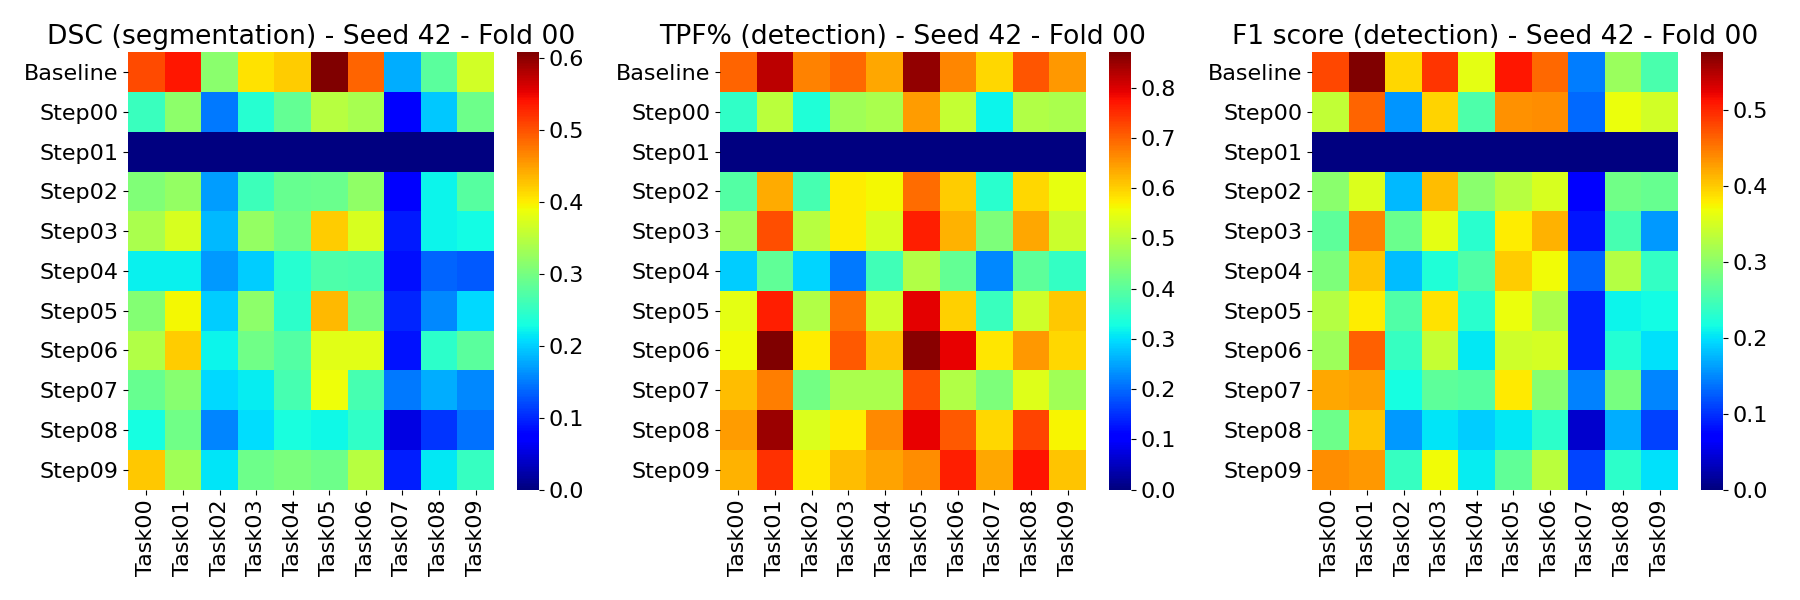

<IPython.core.display.Javascript object>


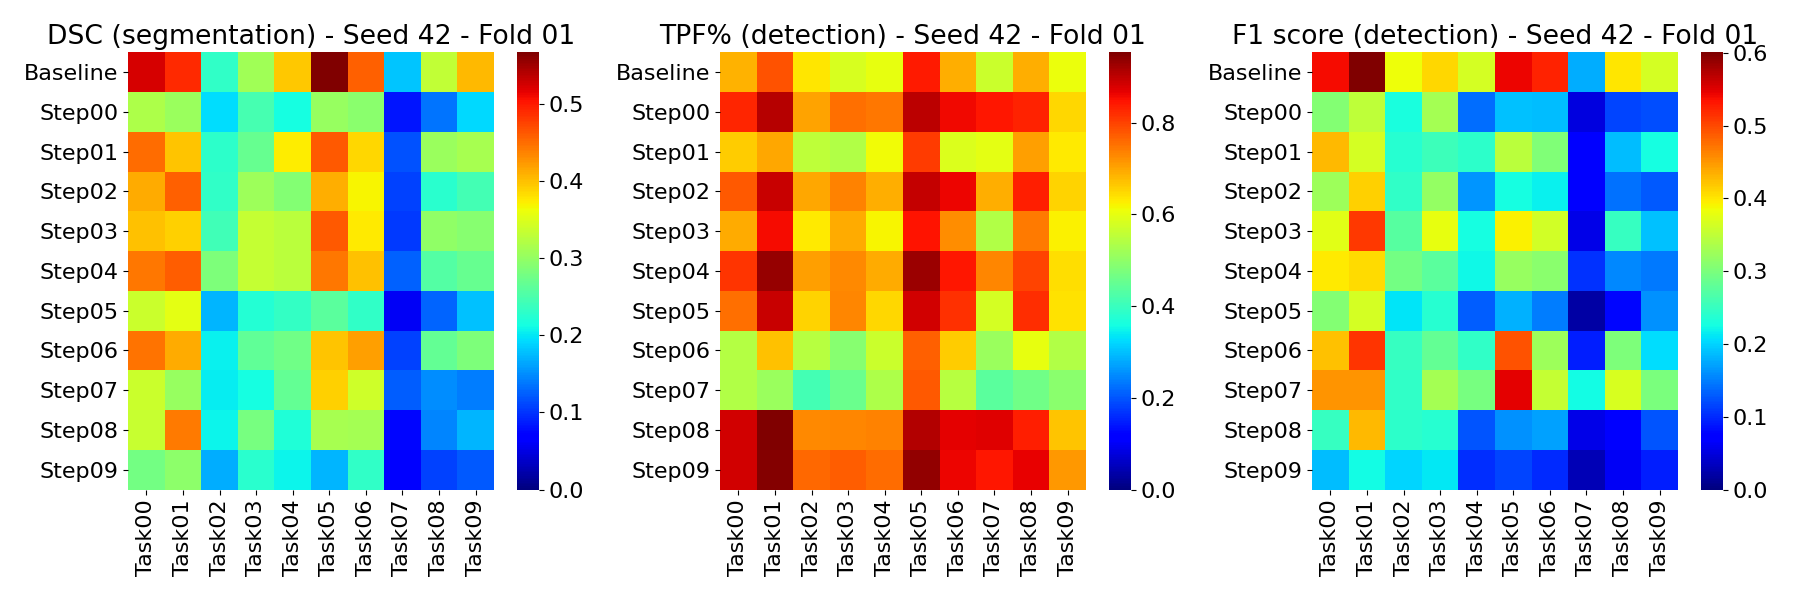

<IPython.core.display.Javascript object>


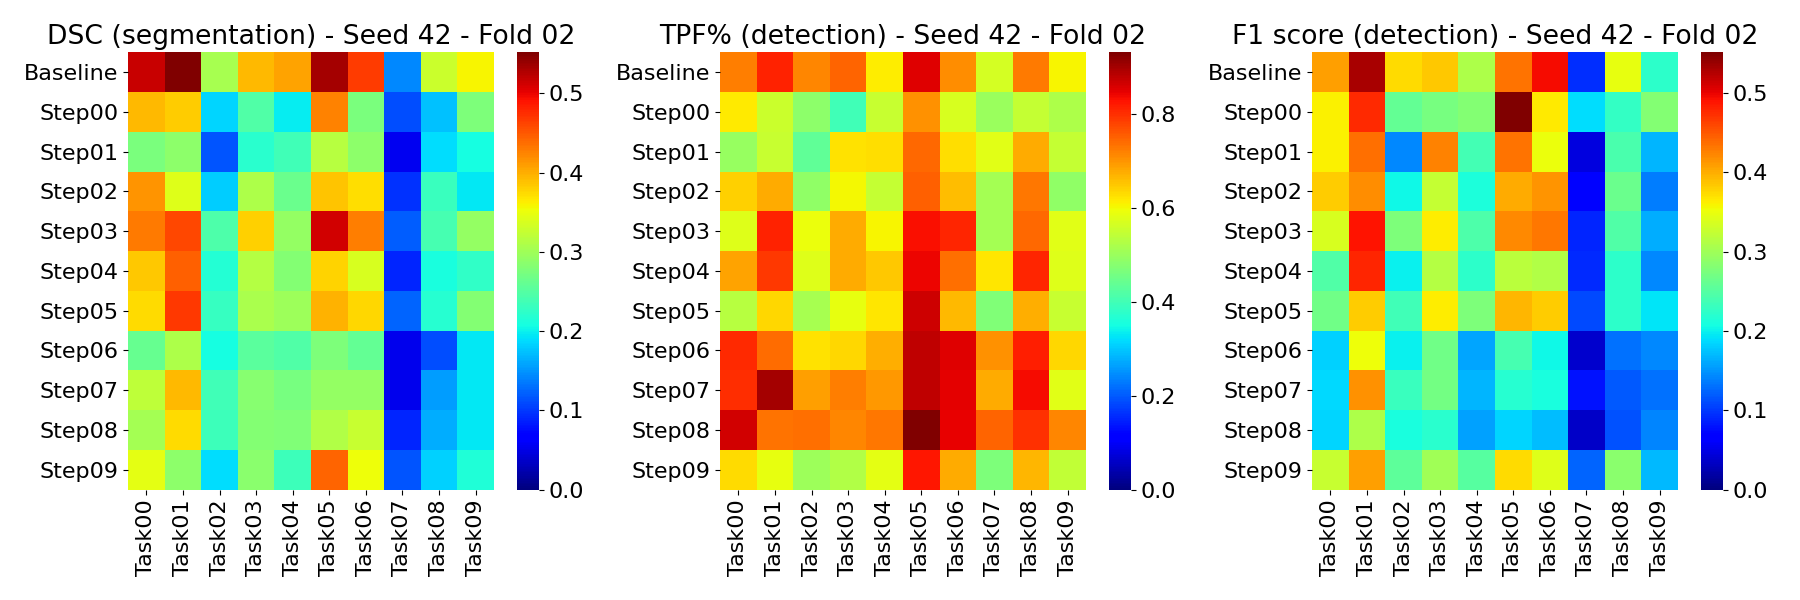

<IPython.core.display.Javascript object>


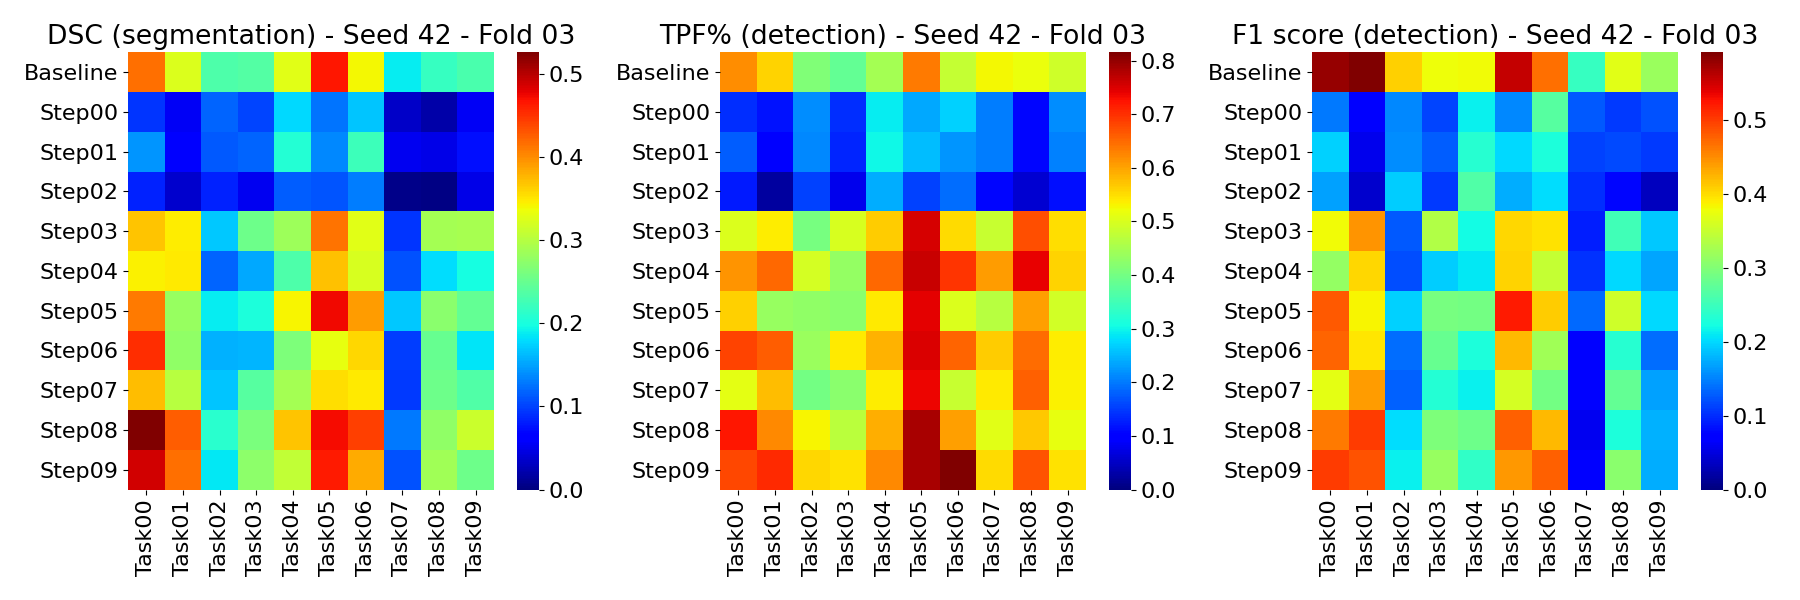

<IPython.core.display.Javascript object>


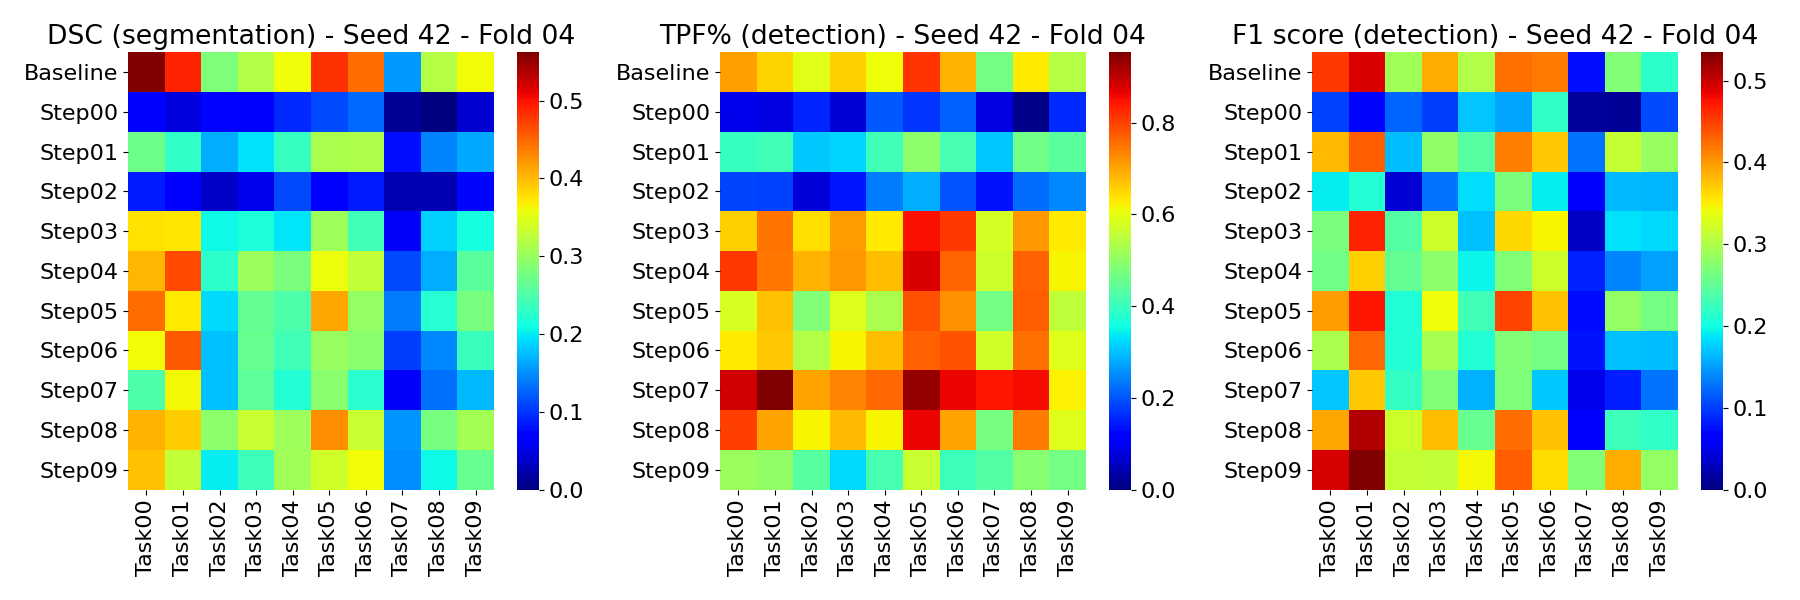

<IPython.core.display.Javascript object>


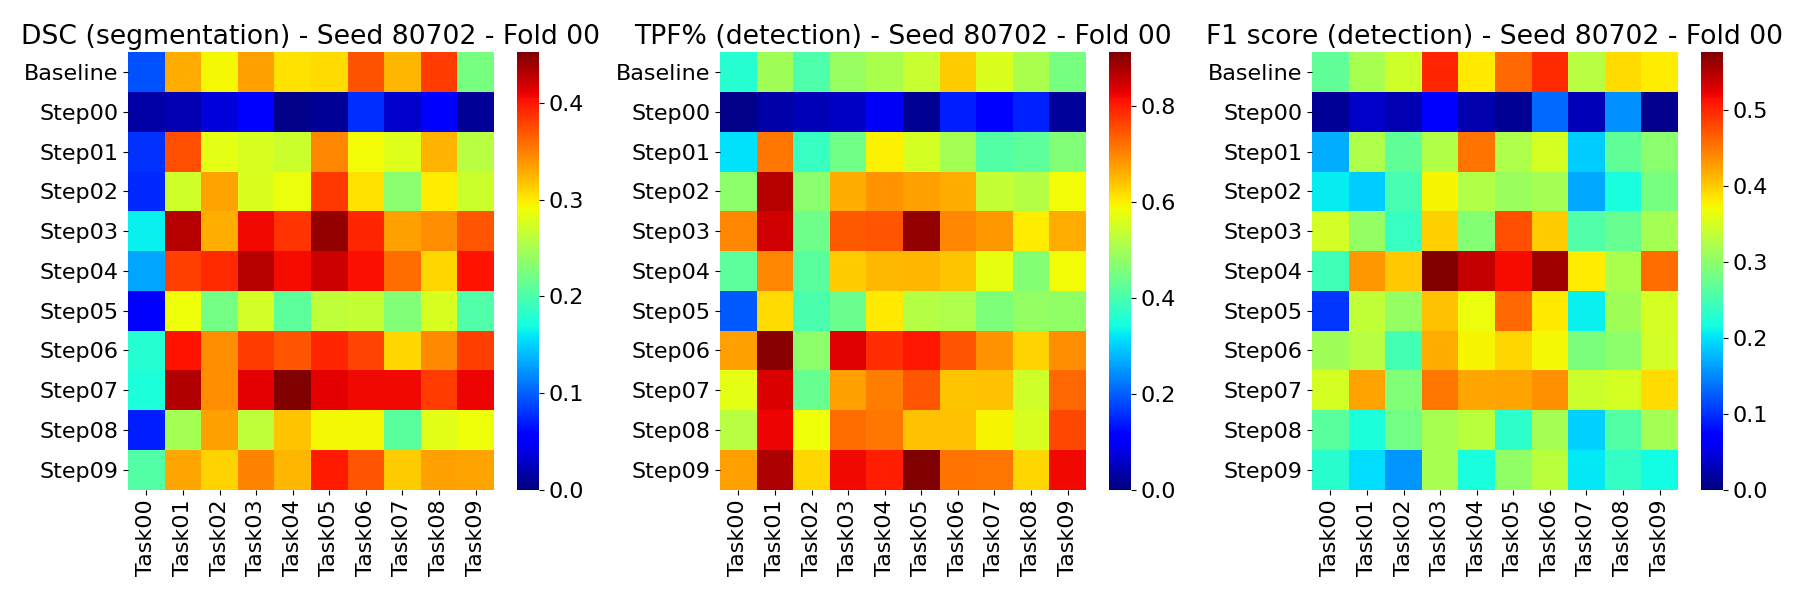

<IPython.core.display.Javascript object>


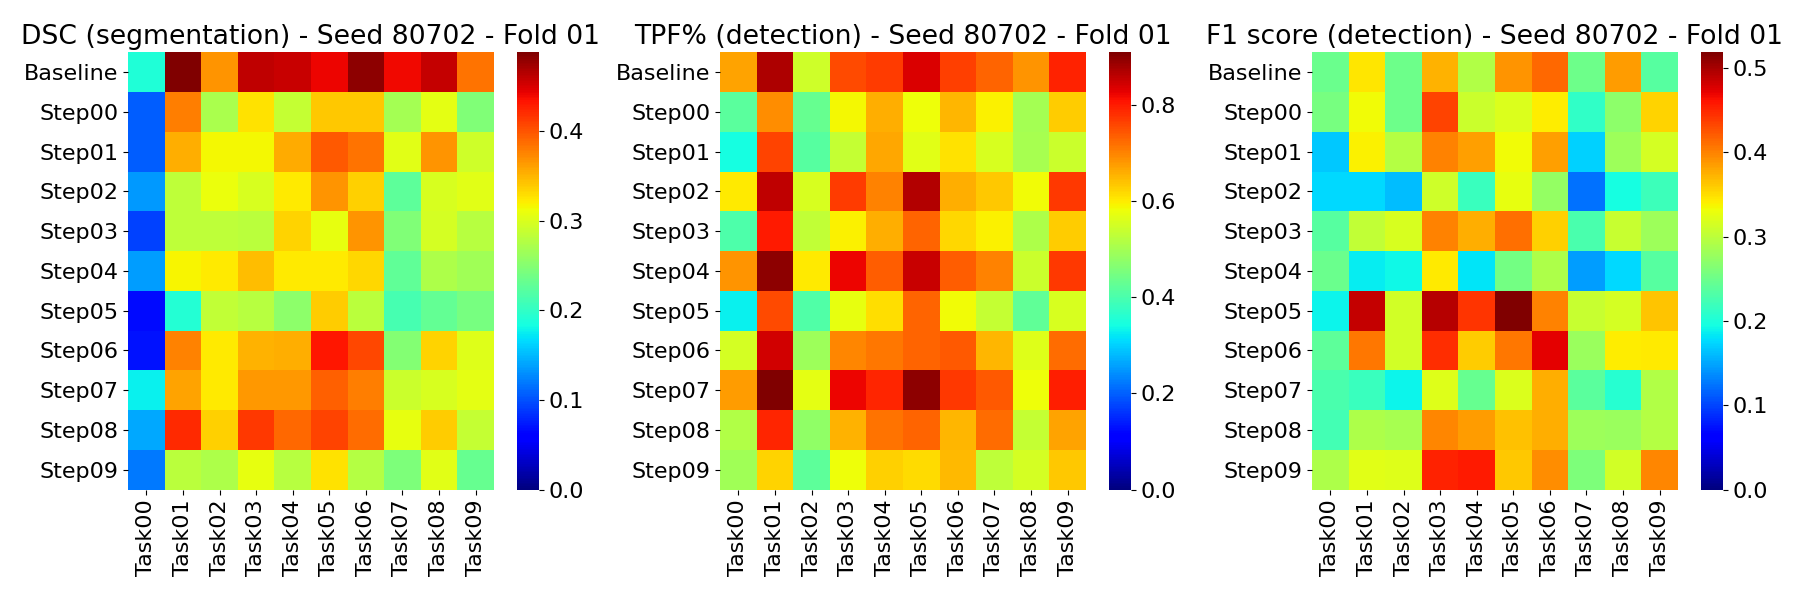

<IPython.core.display.Javascript object>


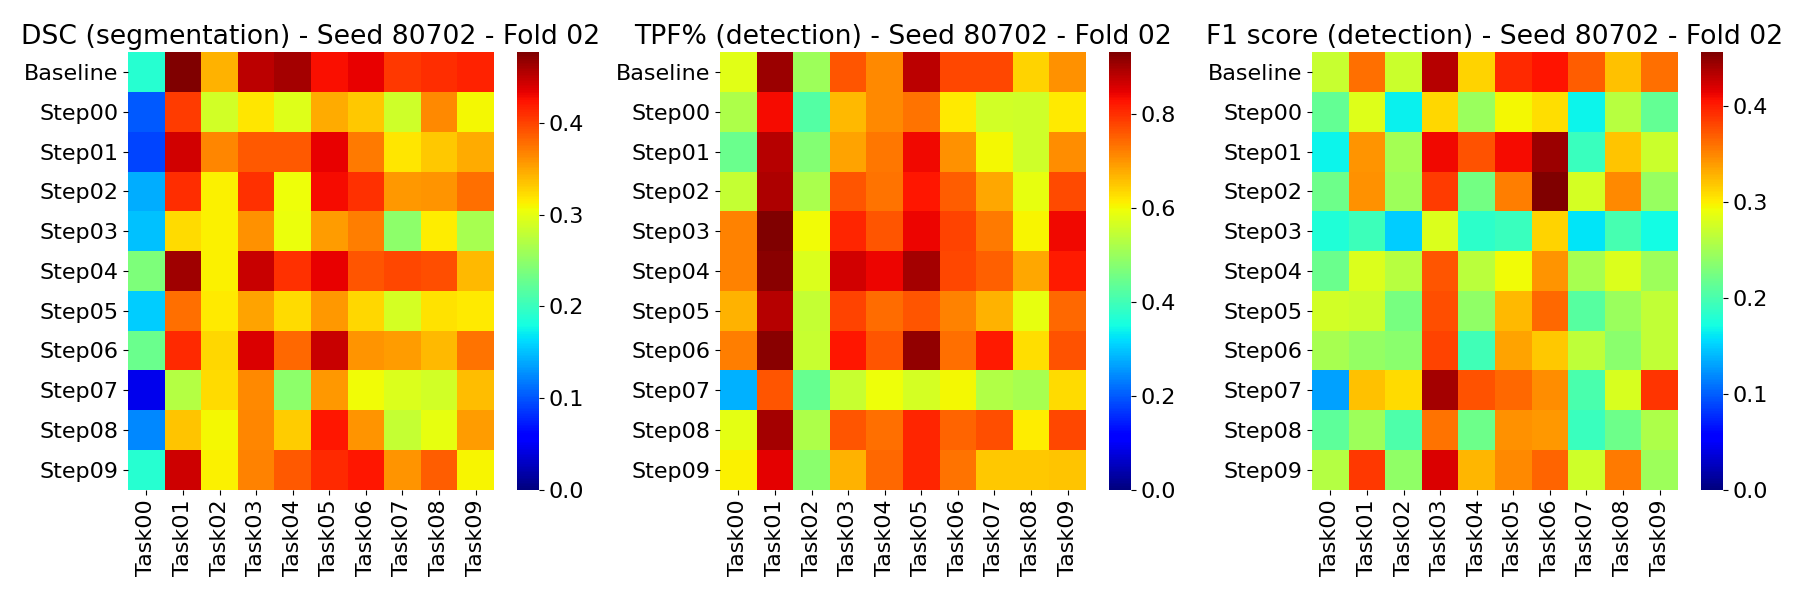

<IPython.core.display.Javascript object>


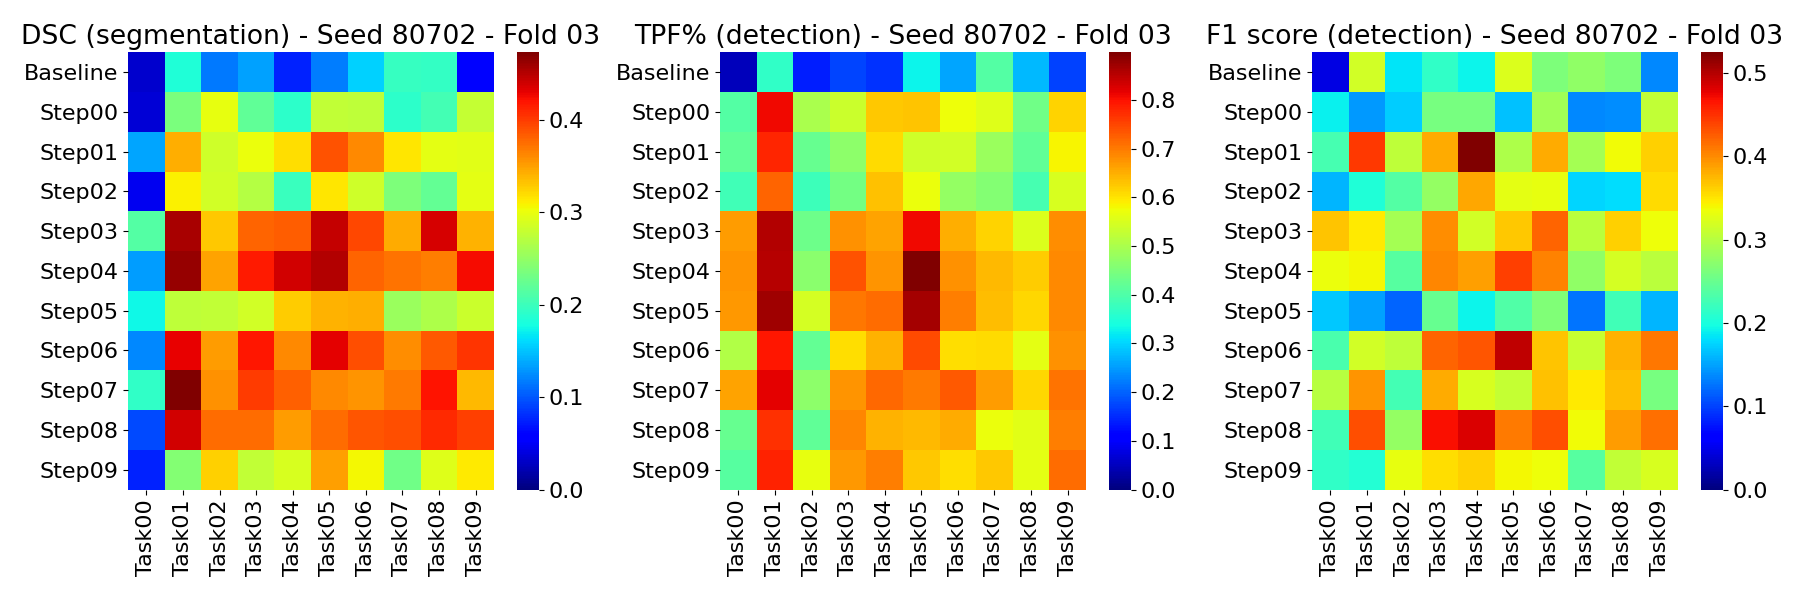

<IPython.core.display.Javascript object>


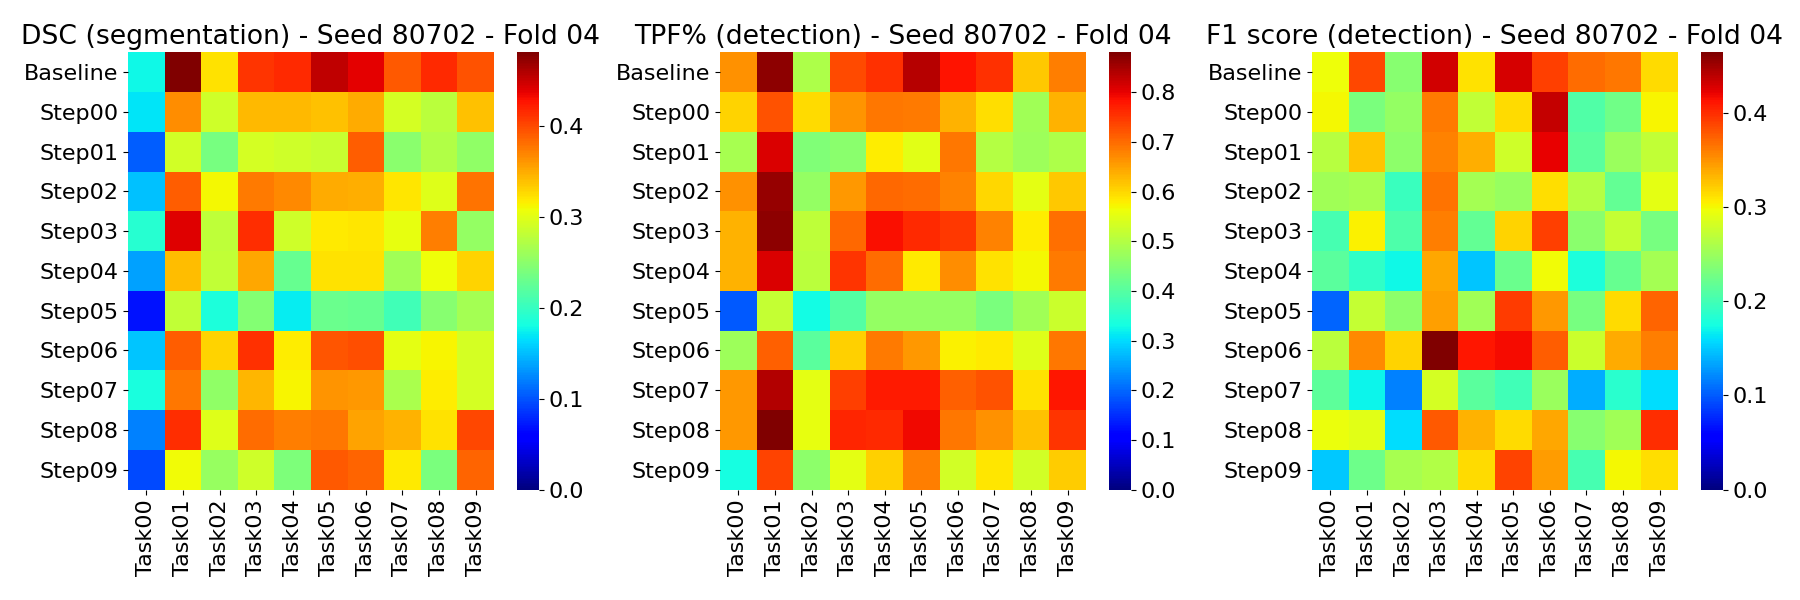

<IPython.core.display.Javascript object>


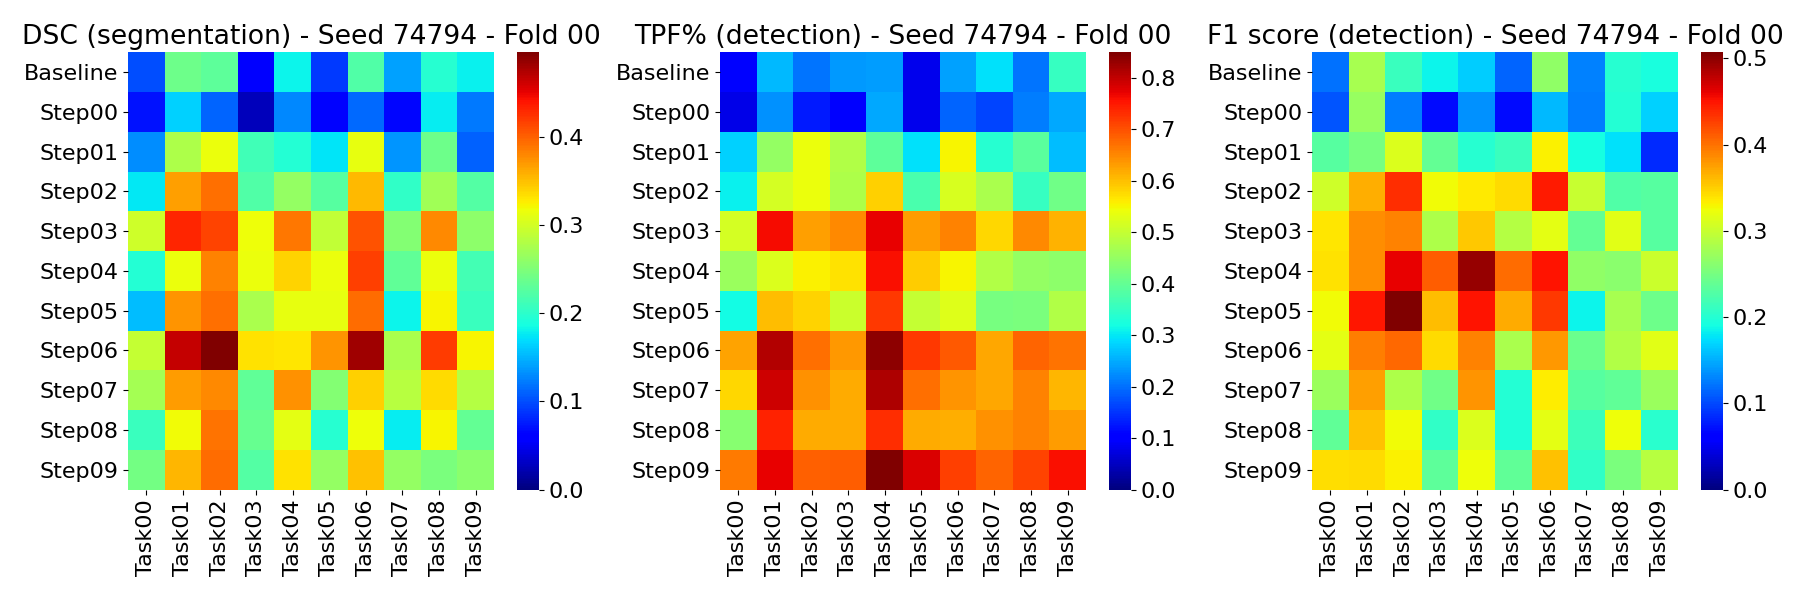

<IPython.core.display.Javascript object>


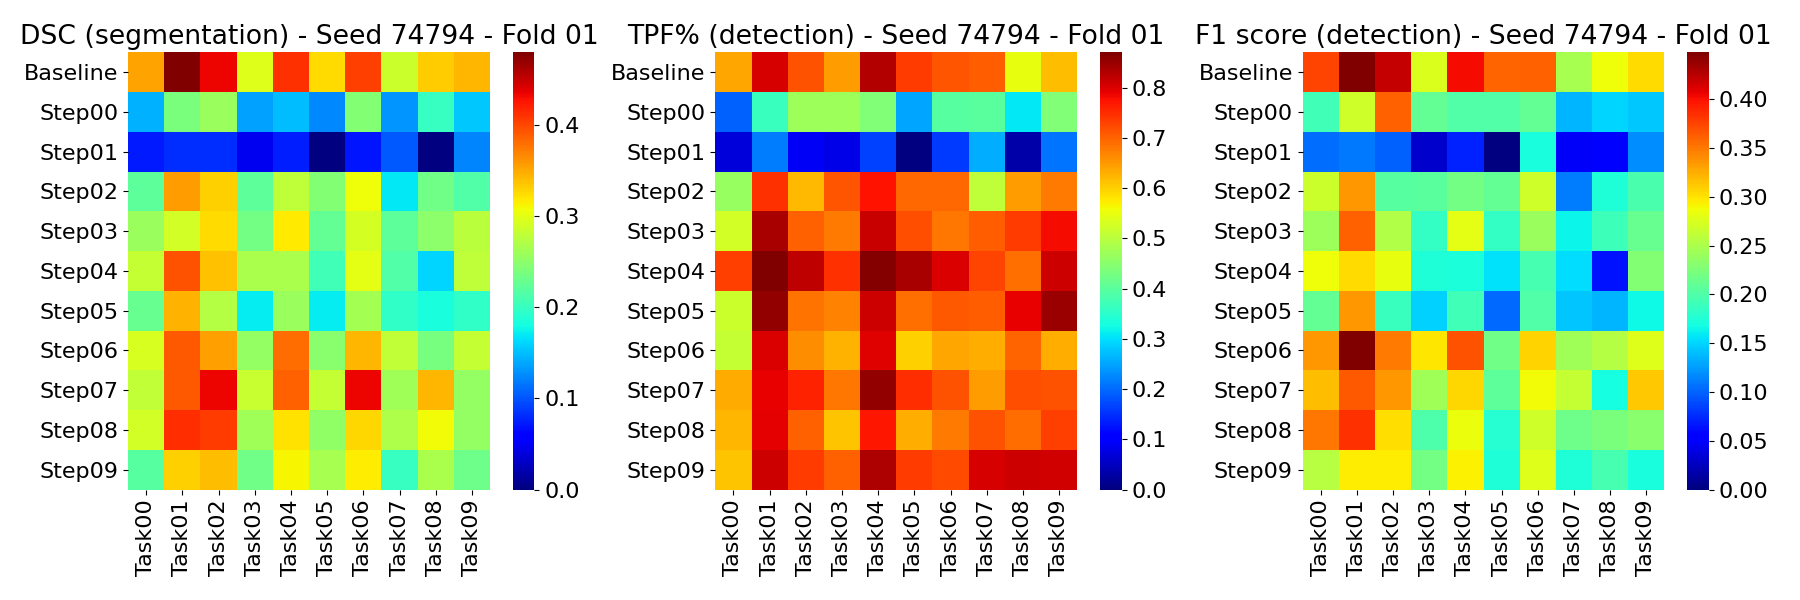

<IPython.core.display.Javascript object>


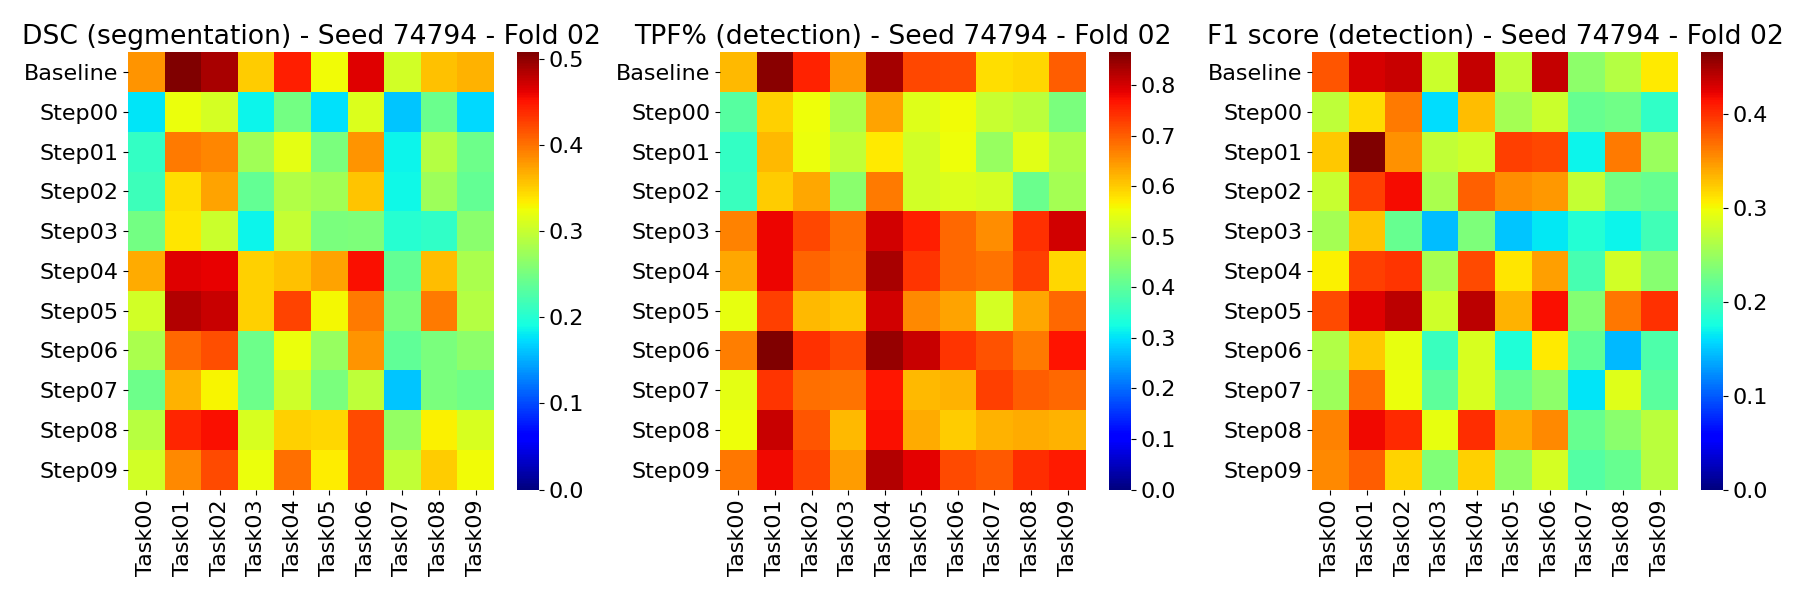

<IPython.core.display.Javascript object>


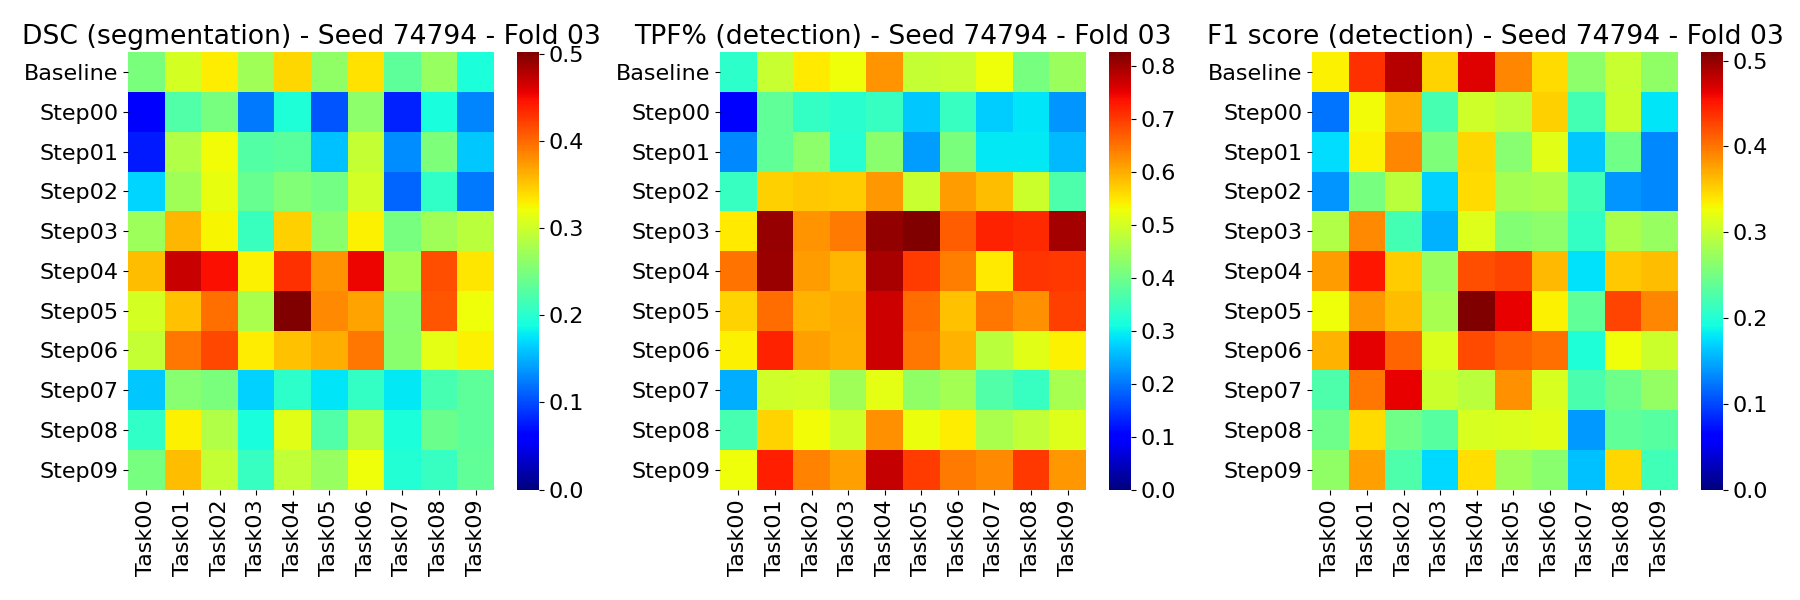

<IPython.core.display.Javascript object>


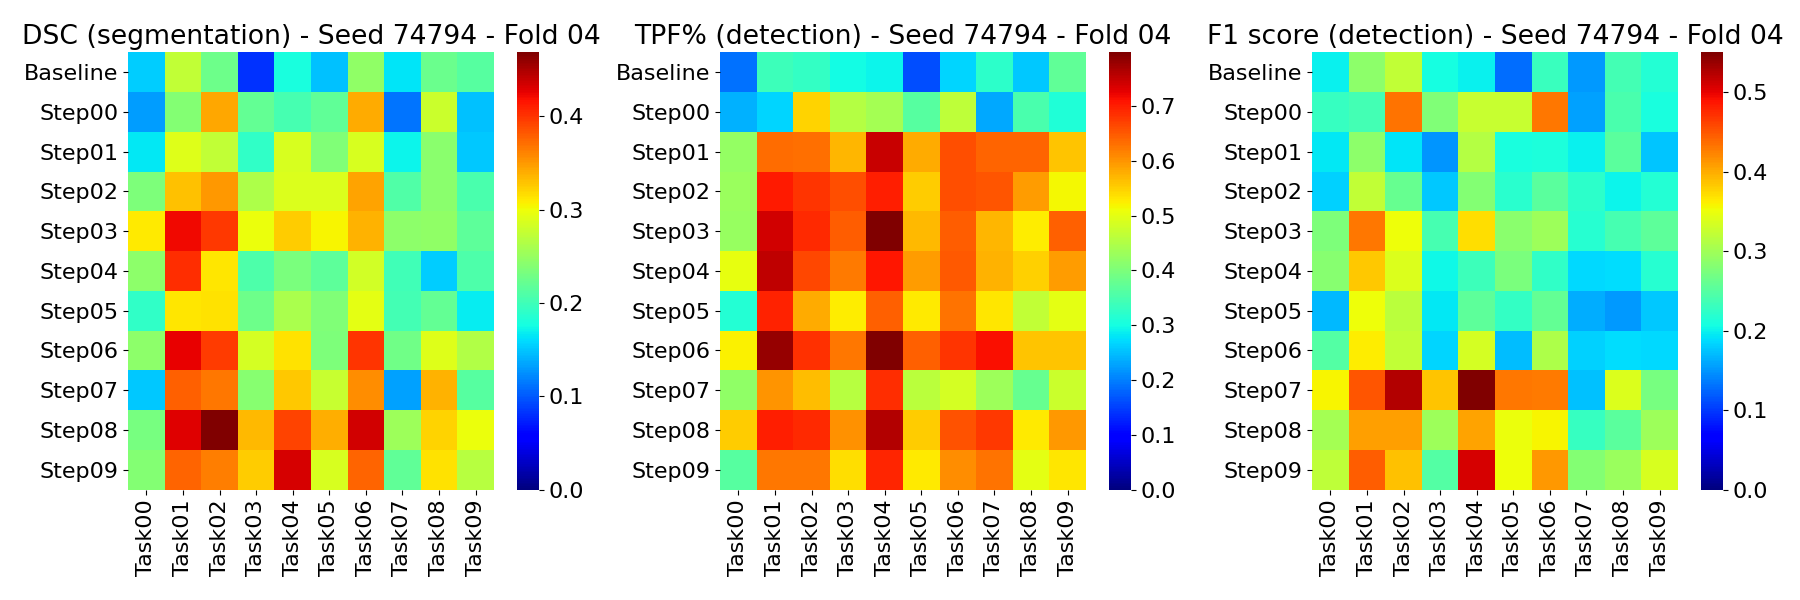

In [151]:
dsc_bl_list = []
dsc_naive_list = []
dtpf_bl_list = []
dtpf_naive_list = []
f1_bl_list = []
f1_naive_list = []

for seed in ['42', '80702', '74794']:
    for fold in range(5):
        naive_file = 'activity_unet-naive-training.f{:d}.s{:}.t09.jsom'.format(fold, seed)
        bl_file = 'activity_unet-baseline-training.f{:d}.s{:}.jsom'.format(fold, seed)

        json_file = os.path.join(json_path, naive_file)
        with open(json_file, 'r') as testing_json:
            naive_results = json.load(testing_json)

        json_file = os.path.join(json_path, bl_file)
        with open(json_file, 'r') as testing_json:
            bl_results = json.load(testing_json)

        positive_naive = [{
            sub: data
            for sub, data in task_results.items() if 'CHN' not in sub and 'NEG' not in sub
        } for task_results in naive_results]
        chp_naive = [{
            sub: data
            for sub, data in task_results.items() if 'CHP' in sub
        } for task_results in naive_results]
        pos_naive = [{
            sub: data
            for sub, data in task_results.items() if 'POS' in sub
        } for task_results in naive_results]
        train_naive = [{
            sub: data
            for sub, data in task_results.items()
            if not np.any([tag in sub for tag in ['NEG', 'CHN', 'CHP', 'POS']]).any()
        } for task_results in naive_results]

        positive_bl = [{
            sub: data
            for sub, data in task_results.items() if 'CHN' not in sub and 'NEG' not in sub
        } for task_results in bl_results]
        chp_bl = [{
            sub: data
            for sub, data in task_results.items() if 'CHP' in sub
        } for task_results in bl_results]
        pos_bl = [{
            sub: data
            for sub, data in task_results.items() if 'POS' in sub
        } for task_results in bl_results]
        train_bl = [{
            sub: data
            for sub, data in task_results.items()
            if not np.any([tag in sub for tag in ['NEG', 'CHN', 'CHP', 'POS']]).any()
        } for task_results in bl_results]

        dsc_bl, dsc_naive, dtpf_bl, dtpf_naive, f1_bl, f1_naive = plot_train_metrics(
            positive_bl, positive_naive, 'Continuum',
            os.path.join(json_path, 'continuum_train_plots_f{:d}_s{:}.png'.format(fold, seed)),
            seed, fold
        )
        
        dsc_bl_list.append(dsc_bl)
        dsc_naive_list.append(dsc_naive)
        dtpf_bl_list.append(dtpf_bl)
        dtpf_naive_list.append(dtpf_naive)
        f1_bl_list.append(f1_bl)
        f1_naive_list.append(f1_naive)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


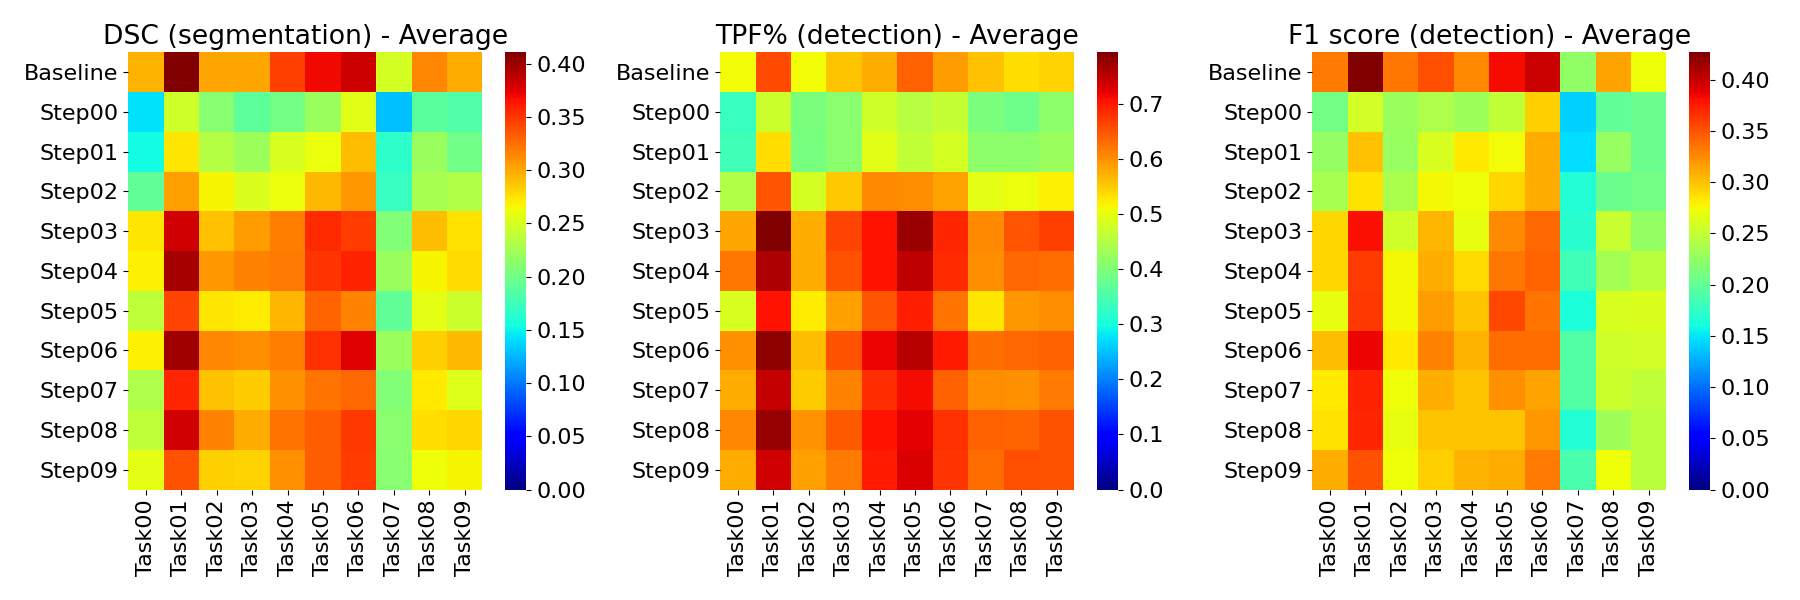

<IPython.core.display.Javascript object>


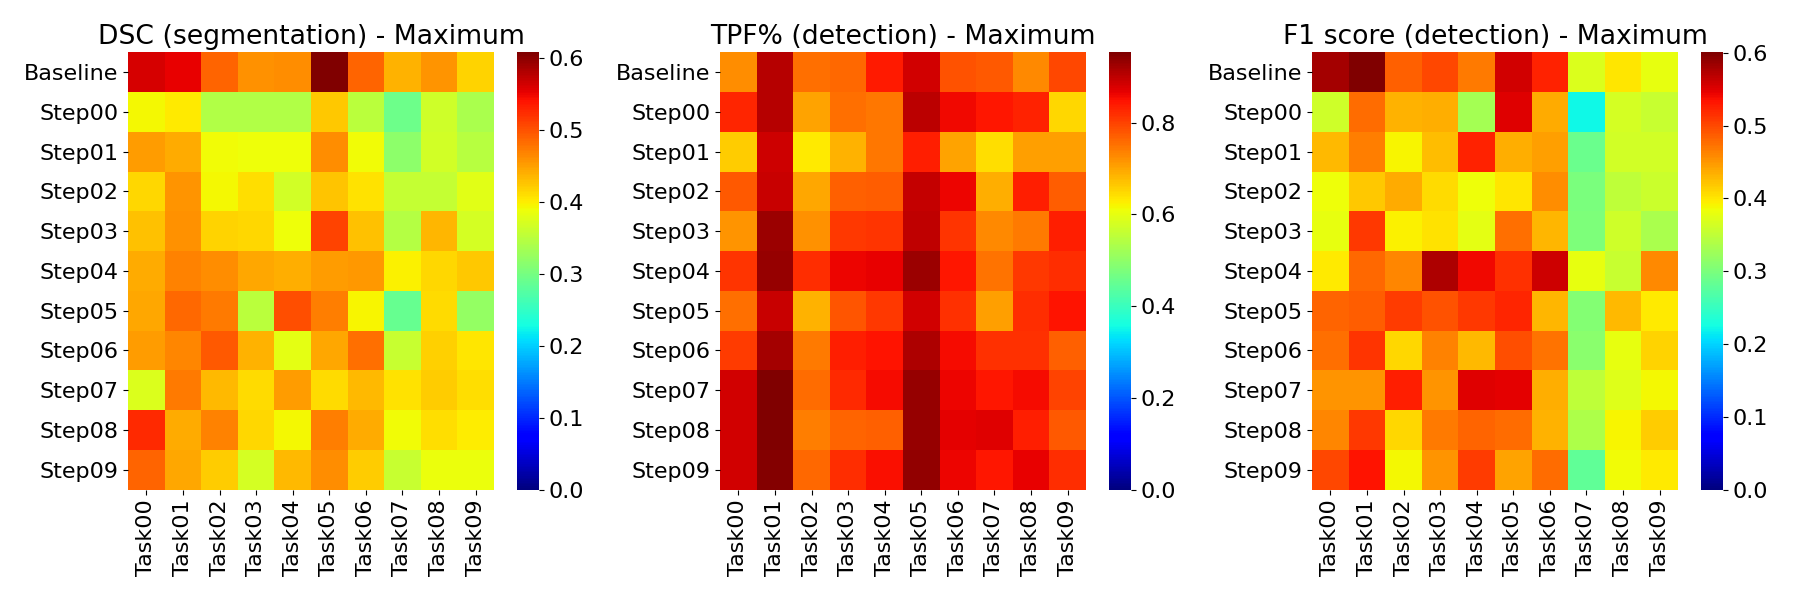

In [149]:
fig = plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
sn.heatmap(
    np.concatenate([np.min(dsc_bl_list, axis=0), np.min(dsc_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('DSC (segmentation) - Minimum')

ax = plt.subplot(1, 3, 2)
sn.heatmap(
    np.concatenate([np.min(dtpf_bl_list, axis=0), np.min(dtpf_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('TPF% (detection) - Minimum')

ax = plt.subplot(1, 3, 3)
sn.heatmap(
    np.concatenate([np.min(f1_bl_list, axis=0), np.min(f1_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('F1 score (detection) - Minimum')

plt.tight_layout()
plt.savefig(os.path.join(json_path, 'continuum_train_plots_min.png'.format(fold, seed)))


fig = plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
sn.heatmap(
    np.concatenate([np.mean(dsc_bl_list, axis=0), np.mean(dsc_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('DSC (segmentation) - Average')

ax = plt.subplot(1, 3, 2)
sn.heatmap(
    np.concatenate([np.mean(dtpf_bl_list, axis=0), np.mean(dtpf_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('TPF% (detection) - Average')

ax = plt.subplot(1, 3, 3)
sn.heatmap(
    np.concatenate([np.mean(f1_bl_list, axis=0), np.mean(f1_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('F1 score (detection) - Average')

plt.tight_layout()
plt.savefig(os.path.join(json_path, 'continuum_train_plots_mean.png'.format(fold, seed)))


fig = plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
sn.heatmap(
    np.concatenate([np.max(dsc_bl_list, axis=0), np.max(dsc_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('DSC (segmentation) - Maximum')

ax = plt.subplot(1, 3, 2)
sn.heatmap(
    np.concatenate([np.max(dtpf_bl_list, axis=0), np.max(dtpf_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('TPF% (detection) - Maximum')

ax = plt.subplot(1, 3, 3)
sn.heatmap(
    np.concatenate([np.max(f1_bl_list, axis=0), np.max(f1_naive_list, axis=0)]),
    cmap='jet', vmin=0, xticklabels=['Task{:02d}'.format(si) for si in range(10)],
    yticklabels=['Baseline'] + ['Step{:02d}'.format(si) for si in range(10)]
)
plt.title('F1 score (detection) - Maximum')

plt.tight_layout()
plt.savefig(os.path.join(json_path, 'continuum_train_plots_max.png'.format(fold, seed)))